# 웹크롤링(Web Crawling) 기초
* 웹 크롤링은 인터넷에서 특정 웹사이트나 웹페이지의 데이터를 자동으로 수집하는 기술
* 프로그램을 사용하여 웹페이지를 방문하고, HTML 문서, 텍스트, 이미지, 또는 기타 데이터를 추출하여 저장하는 방식으로 이루어짐
* 활용분야: 최신 뉴스 자동 수집, 전자상거래 웹사이트에서 상품 정보(가격, 리뷰, 상품 등) 수집, 데이터 분석을 포함


### 웹 크롤링의 주요 절차

1. 요청(Request): 데이터를 수집하고 싶은 웹사이트에 **접근 허락 요청**을하고, **가공되지 않은 HTML 코드(데이터)를** 가져옴
* requests 라이브러리가 사용

2. 파싱(Parsing): 가공되지 않은 HTML 코드를 **원하는 조건으로 탐색하고 추출할 수 있는 HTML 코드로 변환**하고, 그 코드에서 원하는 태그와 관련 데이터를 추출
* BeautifulSoup 같은 라이브러리를 활용
* for문, findall() 함수,find()함수를 사용

3. 데이터 저장: 추출한 데이터를 Pandas의 **데이터프레임(엑셀과 유사)으로 저장**
* Pandas 라이브러리를 이용하고, 그 데이터프레임을 **CSV 파일 형식으로 변환**해서 내드라이브의 폴더(예, mypython)으로 저장하는 방식이 일반적 (이번 워크숍에서는 다루지 않음)

### 간단한 Python 웹 크롤링 예시


### 1. 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 2. 필요한 라이브러리 활용

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### 3. 웹페이지에 접근요청하고 가공하지 않은 HTML 데이터를 가져오기
* requests 라이브러리를 이용해서 데이터를 수집하고자하는 웹 페이지에 HTTP 요청을 보내 응답 데이터를 확인
* 가공하지 않은 원본 HTML 코드를 받아오기
* 아래 예시 코드의 requests.get(URL) 이용하여 HTTP 요청 상태 확인(예: 200: 성공, 404: 실패)
* 아래 예시 코드의 html.text 이용해서 가공되지 않은 HTML 코드를 추출하고 문자열로 출력함
* 그러나 이 코드 출력값으로는 HTML 코드를 직접 탐색하거나 분석하지 않음


In [ ]:
# 크롤링할 Yes24 베스트셀러 페이지의 URL을 지정
URL ='https://www.yes24.com/Product/Category/BestSeller?categoryNumber=001&pageNumber=1&pageSize=24'

# 지정된 URL에 HTTP GET 요청을 보내고, 응답 데이터(응답상태와 가공하지 않은 HTML 코드)를 html에 저장
html = requests.get(URL)

# HTTP 응답 상태 코드 출력
print(html) # 출력값: <Response [200]>, 200는 HTTP 상태 코드: 200은 성공, 404: 요청한 페이지를 찾을 수 없음, 403: 접금금지, 500: 서버에러

# 가져온 HTML 코드 출력(가공하지 않은 코드)
print(html.text)
# 예) <!DOCTYPE html><html><head><title>Yes24 베스트셀러</title></head><body><div class="book">...</div></body></html>

 ### 5. 탐색하고 추출하기 쉬운 HTML 코드로 변환하고, 원하는 데이터 부분을 추출하기(파싱)
* BeautifulSoup 클래스를 이용해서 가져온 HTML 코드를 여러가지 조건에 맞게 원하는 부분만 추출하기(파싱)
* BeautifulSoup 클래스는 bs4(BeautifulSoup4) 라이브러리에 속해있음
* BeautifulSoup 클래스를 이용해서 가공하지 않은 HTML 코드를 탐색하고 추출하기 쉽게 변환
* 변환된 HTML 데이터를 조건에 맞게 여러 함수를 이용해 원하는 특정 태그와 데이터를 추출


In [ ]:
# BeautifulSoup 클래스 이용
from bs4 import BeautifulSoup

#  가져온 HTML 코드(html.text)를 분석가능한 HTML 코드로 변환(= BeautifulSoup 객체라고도 함)
soup = BeautifulSoup(html.text,'html.parser') # 'html.parser': HTML 코드를 분석하기 위한 파서(분석도구)
print(soup)


### 6. Yes24 베스트셀러 페이지의 서적명 추출
1. BeautifulSoup 객체에서 **<div> 태그 중 클래스가 'itemUnit'인 모든 요소** 를 찾고, 그 리스트를 **books 변수에 저장하기**
2. 문법형식: HTML코드객체.find_all('태그이름', class = '클래스이름')
3. for문, find_all(), find() 함수 사용

* 예시코드: 베스트셀러 서적명 추출

In [ ]:
# 위 변환한 HTML코드인 BeautifulSoup 객체(soup)에서
# find_all 이라는 함수를 이용해서 <div> 태그 중 클래스(class)가 'itemUnit'인 *모든 요소* 찾아, 그 리스트를 books 변수에 저장하기
books = soup.find_all('div', class_='itemUnit') #()안은 원하는 조건임

# 각 책의 제목이 담긴 <a>태그 코드 반복해서 출력(for문 사용)
for book in books:
    a_tag_title = book.find('a', class_='gd_name')
    print(a_tag_title)

# 클래스가 'itemUnit'인 모든 <div> 태그(books)의 HTML 블록를 하나씩 순회
# 그 <a> 태그 중 클래스(class)가 'gd_name'인 조건을 만족하는 태그를 하나씩 선택
# 책 제목이 담긴 <a> 태그 코드를 차례차례 a_tag_title에 저장
# a_tag_title(책 제목이 담긴 <a> 태그 코드)을 출력

# 각 책의 제목 출력
for book in books:
    title = book.find('a', class_='gd_name').text
    print(title)

# 클래스가 'itemUnit'인 모든 <div> 태그(books)의 HTML 블록를 하나씩 순회
# 그 <a> 태그 중 클래스(class)가 'gd_name'인 조건을 만족하는 태그를 하나씩 선택
# .text를 사용해 해당 <a> 태그의 텍스트(책 제목만)를 하나씩 추출
#  책제목을 하나씩 title 변수에 차례차례 저장
#  title(<a> 태그 코드 중 책 제목만)을 하나씩 출력





### 참고: 코드 동작 예시
* books 리스트에 에 포함된 요소:

In [ ]:
[<div class="itemUnit">
    ...
    <a class="gd_name" href="/Product/Goods/126590468" ...>초역 부처의 말</a>
    ...
</div>,
<div class="itemUnit">
    ...
    <a class='gd_name: href="/Product/Goods/142661358" ...>사카모토 데이즈 19 트리플 특전판</a>
    ...
</div>,
 ...
 ...
 ...
 ...
 .
 .
 .
 </div>]


# 1. Yes24 베스트셀러 페이지 크롤링해서 출력하는 파이썬 코드

In [ ]:
import requests
from bs4 import BeautifulSoup

# 크롤링할 Yes24 베스트셀러 페이지의 URL을 지정.
URL ='https://www.yes24.com/Product/Category/BestSeller?categoryNumber=001&pageNumber=1&pageSize=24'

# 웹 페이지 요청: 지정된 URL에 HTTP GET 요청을 보내고, 응답 데이터를 response에 저장
html = requests.get(URL)

# HTML 코드 파싱: 받은 HTML 코드(html.text)를 분석가능한 HTML 코드로 변환해서 원하는 데이터를 탐색하고 추출
soup = BeautifulSoup(html.text,'html.parser') # 'html.parser': HTML 코드를 분석하기 위한 파서(분석을 위한 도구)

# 클래스가 'itemUnit'인 모든 <div> 태그 찾기: 그 리스트를 books 변수에 저장하기
books = soup.find_all('div', class_='itemUnit')

# 각 책의 제목 출력
for book in books:
    title = book.find('a', class_='gd_name').text
    print(title)

# 클래스가 'itemUnit'인 모든 <div> 태그(books)의 HTML 블록를 하나씩 순회
# 그 <a> 태그 중 클래스(class)가 'gd_name'인 조건을 만족하는 태그를 하나씩 선택
# .text를 사용해 해당 <a> 태그의 텍스트(책 제목)를 하나씩 추출
#  책제목 하나씩 title 변수에 차례차례 저장

### 수집한 자료를 파일로 쓰고 불러오는 파이썬 코드

*   파일 처리는 프로그래밍에서 중요한 작업

*   텍스트 파일을 쓰고 저장하는 방법과, 저장된 파일을 불러와 읽는 방법

### 1) 파일 쓰기와 저장하기

*   파일 쓰기: 텍스트 데이터를 파일에 저장하기 위해서는 open() 함수를 사용하여 파일을 열고, write() 메서드를 사용해 내용을 원하는 폴더 씀

*   파일을 다 쓴 후에는 자동으로 파일을 닫아주는 with 구문을 사용하는 것이 좋음

In [14]:
# 드라이브 연동한 상태로 파일에 저장 (책 제목을 하나씩 기록)
with open("bestseller_books.txt", "w", encoding="utf-8") as f:
    for book in books:
        title = book.find('a', class_='gd_name').text#.strip()
        f.write(title + "\n")  # 한 줄씩 저장 -  f는 파일을 가리키는 파일 객체(file object)

print("파일이 저장되었습니다:bestseller_books.txt")

파일이 저장되었습니다:bestseller_books.txt


### 2) 파일 불러와서 읽기

*   파일 읽기: 저장된 파일의 내용을 불러오려면, 파일을 읽기 모드("r")로 열고, read() 메서드를 사용하여 내용을 읽어옴

In [ ]:
with open("bestseller_books.txt", "r", encoding="utf-8") as f:
    content = f.read() # f는 파일을 가리키는 파일 객체(file object)

print(content)  # 전체 내용을 한 번에 출력

### 숙제:. Yes24 베스트셀러 페이지 크롤링해서 **리스트로 저장**하고 출력하고 폴더에 저장하기

In [ ]:
import requests
from bs4 import BeautifulSoup

# 크롤링할 Yes24 베스트셀러 페이지의 URL을 지정
URL = 'https://www.yes24.com/Product/Category/BestSeller?categoryNumber=001&pageNumber=1&pageSize=24'

# 웹 페이지 요청: 지정된 URL에 HTTP GET 요청을 보내고, 응답 데이터(응답과 htmㅣ코드)를 html에 저장
html = requests.get(URL)

# HTML 코드 파싱: 받은 HTML 코드(html.text)를 분석가능한 HTML 코드로 변환해서 원하는 데이터를 탐색하고 추출
soup = BeautifulSoup(html.text, 'html.parser')

# 클래스가 'itemUnit'인 모든 <div> 태그 찾기: 그 리스트를 books 변수에 저장하기
books = soup.find_all('div', class_='itemUnit')

# 빈 리스트 생성
book_titles = []

# 각 책 제목을 리스트에 추가
for book in books: # 클래스가 'itemUnit'인 모든 <div> 태그(books)를 순회하면서 각각의 태그에 대해 ...
    title = book.find('a', class_='gd_name').text
    book_titles.append(title)

# 클래스가 'itemUnit'인 모든 <div> 태그(books)의 HTML 블록를 하나씩 순회
# 그 <a> 태그 중 클래스(class)가 'gd_name'인 조건을 만족하는 태그를 하나씩 선택
# .text를 사용해 해당 <a> 태그의 텍스트(책 제목)를 하나씩 추출
#  책제목 하나씩 title 변수에 차례차례 저장
#  그책제목을 빈 리스트은 book_titles = [] 에 하나씩 추가

# 리스트 출력
print(book_titles)


# 2. 멜론음원차트 TOP100 리스트 크롤링(https://www.melon.com/chart/index.htm)

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 크롤링할 Melon TOP100 차트 페이지의 URL을 지정
url = "https://www.melon.com/chart/index.htm"

# 웹 브라우저에서 접근하는 것처럼 보이게 하는 헤더 설정
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0 Safari/537.36",
    "Referer": "https://www.melon.com/chart/"
}

# 웹 페이지 요청: 지정된 URL에 HTTP GET 요청을 보내고, 응답 데이터를 res에 저장
res = requests.get(url, headers=headers)
res.raise_for_status()  # 요청이 실패하면 에러 발생

# HTML 코드 파싱: 받은 HTML 코드를 분석 가능한 형태로 변환해서 원하는 데이터를 탐색하고 추출
soup = BeautifulSoup(res.text, "lxml")  # 'lxml': HTML 코드를 분석하기 위한 파서

# 데이터 추출: 차트의 곡 정보를 담을 리스트 data 생성
data = []

# TOP100 곡들이 있는 행(tr 태그) 중 클래스가 lst50 또는 lst100인 요소를 모두 선택
rows = soup.select("tr.lst50, tr.lst100")

# 각 곡 정보를 반복해서 추출
for row in rows:
    rank = row.select_one("span.rank").get_text(strip=True)  # 순위 추출
    title = row.select_one("div.wrap_song_info div.rank01 a").get_text(strip=True)  # 곡명 추출
    artist = row.select_one("div.wrap_song_info div.rank02 a").get_text(strip=True)  # 아티스트 추출
    album = row.select_one("div.wrap_song_info div.rank03 a").get_text(strip=True)  # 앨범명 추출

    # 콘솔에 결과 출력: 순위, 곡명, 아티스트, 앨범 정보를 지정된 형식으로 출력
    print(f"{rank}위: {title} - {artist} (앨범: {album})")

    # 추출한 데이터를 리스트에 추가
    data.append([rank, title, artist, album])

# DataFrame 변환: 추출한 데이터를 판다스 DataFrame 형태로 변환
df = pd.DataFrame(data, columns=["순위", "곡명", "아티스트", "앨범"])

# 엑셀 저장: DataFrame을 melon_top100.xlsx라는 파일 이름으로 저장
df.to_excel("melon_top100.xlsx", index=False)


## (참고)3. 메가박스 영화 목록 리스트 크롤링(https://www.megabox.co.kr/)

In [ ]:
import requests
import pandas as pd

# [설명] HTML 크롤링 vs JSON API 방식
# - HTML 크롤링: 웹페이지의 HTML 소스를 내려받고, 태그 구조를 분석해 데이터 추출
# - JSON API 방식: 서버가 바로 구조화된 JSON 데이터를 반환 → HTML 파싱 없이 바로 사용 가능
#   (데이터 접근이 더 간단하고 빠름)
# - 이유: 최신 웹사이트는 React, Vue 같은 프론트엔드 프레임워크를 사용해
#   처음에는 빈 HTML만 내려주고, 실제 데이터는 API를 통해 비동기적으로 불러오기 때문에
#   HTML 소스 안에는 원하는 데이터가 아예 없고, API를 직접 호출해야만 접근 가능함

# 크롤링할 메가박스 영화 목록 API URL
url = "https://www.megabox.co.kr/on/oh/oha/Movie/selectMovieList.do"

# API 요청 파라미터
params = {
    "currentPage": 1,
    "recordCountPerPage": 20
}

# 요청 헤더
headers = {
    "User-Agent": "Mozilla/5.0",
    "X-Requested-With": "XMLHttpRequest",
    "Referer": "https://www.megabox.co.kr/movie"
}

# API 요청
r = requests.get(url, params=params, headers=headers)
r.raise_for_status()
data = r.json()

# 영화 데이터 추출 (순위 포함)
movies = []
for idx, m in enumerate(data.get("movieList", []), start=1):
    title = m.get("movieNm")
    rate  = m.get("boxoBokdRt")
    date  = m.get("rfilmDe")
    movies.append([idx, title, rate, date])

# 데이터프레임 생성
df = pd.DataFrame(movies, columns=["순위", "영화제목", "예매율", "개봉일"])

# 콘솔에 보기 좋게 출력
print("=== 메가박스 영화 목록 ===")
for _, row in df.iterrows():
    print(f"{row['순위']}위: {row['영화제목']} (예매율: {row['예매율']}%, 개봉일: {row['개봉일']})")

# 엑셀로 저장 (순위 포함)
df.to_excel("megabox_movies.xlsx", index=False)


## (참고)4-1. 영화관 통합 전산망 실시간 예매율 리스트 크롤링(https://www.kobis.or.kr/)

In [ ]:
import requests
import pandas as pd
from io import StringIO  # 문자열을 파일처럼 감싸 read_html에 전달하기 위한 도구

# [설명] 이 엔드포인트는 HTML 표를 반환하는 폼 기반 POST 방식  # 접근 방식 설명
# - JSON API가 아닌 HTML <table>로 데이터를 제공하므로 pd.read_html()로 파싱  # 파싱 도구 설명
# - 사이트는 CSRF 토큰으로 폼 요청의 정당성을 검사하므로, 최신 토큰과 같은 파라미터 필요  # 보안 제약 설명

# KOBIS: 실시간 예매 리스트(Real Ticket) URL 지정
url = "https://www.kobis.or.kr/kobis/business/stat/boxs/findRealTicketList.do"

# 요청 헤더 설정
# - User-Agent: 브라우저 유사 환경 지정  # 헤더 목적 설명
# - Referer: 요청 출처 검증을 위한 참조 페이지 지정  # 헤더 목적 설명
# - Content-Type: 폼 인코딩 형식 지정  # 헤더 목적 설명
headers = {
    "User-Agent": "Mozilla/5.0",
    "Referer": "https://www.kobis.or.kr/kobis/business/stat/boxs/findRealTicketList.do",
    "Content-Type": "application/x-www-form-urlencoded"
}

# 폼 데이터 설정
# - CSRFToken: 세션 단위 보안 토큰. 동작 실패 시 개발자도구에서 최신 값으로 교체 필요  # 토큰 의미 설명
# - dmlMode, allMovieYn, loadEnd: 내부 스크립트가 전송하는 조회 옵션  # 내부 파라미터 설명
data = {
    "CSRFToken": "jZ9wRb0LbtGhUiheY4jjN2gcHmYlTFpUDHrwzbdk7M",
    "dmlMode": "search",
    "allMovieYn": "Y",
    "loadEnd": "0"
}

# POST 요청 전송
res = requests.post(url, data=data, headers=headers)
res.raise_for_status()      # 실패 시 예외 발생 처리
res.encoding = "utf-8"      # 한글 깨짐 방지 설정

# HTML 테이블 파싱 (FutureWarning 방지: 문자열을 StringIO로 감싸서 전달)
html_io = StringIO(res.text)
tables = pd.read_html(html_io)
if not tables:
    raise ValueError("응답에서 테이블을 찾지 못했습니다. CSRF 토큰/파라미터를 확인하십시오.")
df = tables[0].copy()

# 제공된 thead 구조를 기준으로 표준 컬럼명 매핑  # 컬럼 표준화 설명
# 순서: 순위, 영화명, 개봉일, 예매율, 예매매출액, 누적매출액, 예매관객수, 누적관객수
expected_cols = ["순위", "영화명", "개봉일", "예매율", "예매매출액", "누적매출액", "예매관객수", "누적관객수"]

# 경우에 따라 테이블 맨 앞에 공백/숨김 열이 섞일 수 있어 앞 8개 열을 우선 취함  # 견고성 설명
if len(df.columns) >= 8:
    df = df.iloc[:, :8]
    df.columns = expected_cols
else:
    # 열 수가 다를 경우 디버깅용 출력  # 점검 안내
    print("원본 컬럼:", df.columns.tolist())

# 수치 전처리: 콤마/퍼센트 제거 및 숫자형 변환  # 전처리 목적 설명
def to_number(series, is_percent=False):
    s = (series.astype(str)
               .str.replace(",", "", regex=False)
               .str.replace("%", "", regex=False)
               .str.strip()
               .replace({"": None}))
    s = pd.to_numeric(s, errors="coerce")
    # 예매율은 퍼센트(%) 제거 후 실수형으로 보관
    return s

if "예매율" in df.columns:
    df["예매율"] = to_number(df["예매율"], is_percent=True)
for col in ["예매매출액", "누적매출액", "예매관객수", "누적관객수"]:
    if col in df.columns:
        df[col] = to_number(df[col], is_percent=False)

# 콘솔 요약 출력 형식  # 출력 형식 설명
# n위: 영화명 (개봉: YYYY-MM-DD, 예매율: xx.x%, 예매관객: 123,456, 예매매출: 1,234,567,890, 누적관객: 1,234,567, 누적매출: 12,345,678,901)
print("=== KOBIS 실시간 예매 리스트 요약 ===")
for _, row in df.iterrows():
    rank = row.get("순위")
    title = row.get("영화명")
    open_dt = row.get("개봉일")
    rate = row.get("예매율")
    r_audi = row.get("예매관객수")
    r_sales = row.get("예매매출액")
    a_acc = row.get("누적관객수")
    s_acc = row.get("누적매출액")

    rate_txt   = f"{rate:.1f}%" if pd.notna(rate) else "-"
    r_audi_txt = f"{int(r_audi):,}" if pd.notna(r_audi) else "-"
    r_sales_txt= f"{int(r_sales):,}" if pd.notna(r_sales) else "-"
    a_acc_txt  = f"{int(a_acc):,}" if pd.notna(a_acc) else "-"
    s_acc_txt  = f"{int(s_acc):,}" if pd.notna(s_acc) else "-"

    print(
        f"{rank}위: {title} "
        f"(개봉: {open_dt}, 예매율: {rate_txt}, "
        f"예매관객: {r_audi_txt}, 예매매출: {r_sales_txt}, "
        f"누적관객: {a_acc_txt}, 누적매출: {s_acc_txt})"
    )

# 엑셀 저장  # 결과 보존 설명
df.to_excel("kobis_realticket.xlsx", index=False)


## (참고)4-2. 영화관 통합 전산망 역대 박스 오피스 리스트 크롤링(https://www.kobis.or.kr/)

In [ ]:
import requests
import pandas as pd
from io import StringIO  # 문자열을 파일처럼 다루기 위한 도구

# [설명] HTML 크롤링 vs JSON API 방식
# - HTML 크롤링: 서버가 HTML 문서를 보내면, <table>이나 <div> 등의 태그 안에서 데이터를 직접 추출
# - JSON API: 서버가 바로 구조화된 JSON 데이터를 반환 → HTML을 파싱할 필요 없이 바로 DataFrame 변환 가능
# - 이 사이트의 이 엔드포인트는 HTML 테이블을 반환하므로, 판다스의 read_html()로 표 데이터를 바로 읽어 처리

# KOBIS: 과거 박스오피스(Former Box Office) 조회 URL
url = "https://www.kobis.or.kr/kobis/business/stat/boxs/findFormerBoxOfficeList.do"

# 요청 헤더 설정
# - User-Agent: 브라우저에서 접근하는 것처럼 보이게 하기 위해 사용
# - Referer: 서버가 요청 출처를 검사할 때 "정상 페이지에서 온 요청"임을 알리기 위해 필요
# - Content-Type: 서버에 데이터(파라미터)를 전송할 때 어떤 형식인지 알려줌 (여기서는 폼 데이터)
headers = {
    "User-Agent": "Mozilla/5.0",
    "Referer": "https://www.kobis.or.kr/kobis/business/stat/boxs/findFormerBoxOfficeList.do",
    "Content-Type": "application/x-www-form-urlencoded"
}

# 요청에 함께 보낼 데이터(폼 파라미터) 설정
# - CSRFToken: CSRF(Cross-Site Request Forgery) 공격을 막기 위한 보안 토큰.
#   서버는 사용자가 실제 웹사이트에서 폼을 열고 요청한 것인지 확인하기 위해 이 토큰을 요구함.
#   세션마다 바뀌기 때문에, 개발자도구 Network 탭에서 최신 값을 복사해야 할 수도 있음.
# - loadEnd, searchType 등: 이 API에서 데이터 조회를 위해 필요한 검색 옵션 파라미터들
#   (사이트 내부 자바스크립트가 폼 데이터를 이렇게 보내도록 설계되어 있음)
data = {
    "CSRFToken": "eXXMMaIL8o4BWTd-tKFlzC00nUPe9Zfn6g7Dl-iExKA",  # 세션마다 바뀔 수 있는 보안 토큰
    "loadEnd": "0",          # 데이터 로딩 완료 여부(사이트 내부 로직용)
    "searchType": "search",  # 검색 타입 지정
    "sMultiMovieYn": "",     # 여러 영화 여부 옵션 (빈 값: 전체)
    "sRepNationCd": "",      # 국가 코드 (빈 값: 전체)
    "sWideAreaCd": ""        # 지역 코드 (빈 값: 전체)
}

# POST 요청 보내기: 폼 데이터와 헤더를 함께 전송
# - GET은 URL 뒤에 파라미터를 붙여 보내지만, POST는 요청 본문에 데이터를 실어 보냄
# - 이 API는 내부적으로 POST 방식을 사용하므로, 반드시 POST로 요청해야 함
res = requests.post(url, data=data, headers=headers)
res.raise_for_status()  # 요청이 실패하면 에러 발생
res.encoding = "utf-8"  # 한글 데이터 깨짐 방지

# HTML 테이블 파싱
# - pd.read_html()은 HTML 문서 안의 <table> 태그를 자동으로 찾아 DataFrame으로 변환
# - Pandas 2.x 경고(FutureWarning)를 피하기 위해 문자열을 StringIO로 감싸서 전달
html_io = StringIO(res.text)
tables = pd.read_html(html_io)
if not tables:
    raise ValueError("응답에서 테이블을 찾지 못했습니다. CSRF 토큰이나 파라미터를 확인하세요.")
df = tables[0].copy()  # 첫 번째 테이블 복사

# 컬럼 이름 표준화
# - 사이트가 반환하는 표의 구조가 바뀌면 열 이름도 바뀔 수 있으므로 확인 필요
expected_cols = ["순위", "영화명", "개봉일", "누적매출", "누적관객", "스크린수", "상영횟수"]
if len(df.columns) >= 7:
    df = df.iloc[:, :7]  # 앞쪽 7개 열만 사용
    df.columns = expected_cols
else:
    print("원본 컬럼:", df.columns.tolist())  # 열 수가 다르면 디버깅용 출력

# 숫자형 데이터 전처리
# - HTML 표에서는 숫자도 문자열로 오고, 천 단위 콤마(,)가 들어가 있어서 연산 불가
# - 콤마 제거 후 숫자형으로 변환해서 이후 합계, 평균 등의 수치 계산이 가능하도록 처리
for col in ["누적매출", "누적관객", "스크린수", "상영횟수"]:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)          # 문자열로 변환
            .str.replace(",", "", regex=False)  # 천 단위 콤마 제거
            .str.strip()          # 앞뒤 공백 제거
            .replace({"": None})  # 빈 문자열은 결측치(None)로 처리
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")  # 숫자형으로 변환

# 콘솔 요약 출력
# - 가독성을 위해 각 영화의 순위, 제목, 개봉일, 누적 관객, 누적 매출을 한 줄씩 정리
# - 숫자는 천 단위 콤마를 다시 넣어서 보기 좋게 표시
print("=== KOBIS 과거 박스오피스 요약 ===")
for _, row in df.iterrows():
    rank = row.get("순위")
    title = row.get("영화명")
    open_dt = row.get("개봉일")
    audi_acc = row.get("누적관객")
    sales_acc = row.get("누적매출")
    audi_txt = f"{int(audi_acc):,}" if pd.notna(audi_acc) else "-"  # 천 단위 콤마 적용
    sales_txt = f"{int(sales_acc):,}" if pd.notna(sales_acc) else "-"
    print(f"{rank}위: {title} (개봉: {open_dt}, 누적관객: {audi_txt}, 누적매출: {sales_txt})")

# 결과를 엑셀 파일로 저장
# - 분석 결과를 외부에서도 활용할 수 있도록 표 형식 그대로 저장
df.to_excel("kobis_former_boxoffice.xlsx", index=False)


# 5. 네이버뉴스 스크래핑: network API 활용

### 1)검색 뉴스 결과를 network 통해 찾기
- 검색 결과 창에서 스크롤다운하면 more?cluster-- 파일이 생성됨.
- 추출할 정보 일부분을 search를 통해 확인하면 파일 수월하게 찾음
- 이 파일의 'Response'을 확인하면 뉴스 10개씩 담고 있음을 확인
- 이 파일의 'Headers' 부분에서 필요한 요청 url과 headers 정보 확인
- 필요한 요청 정보 구성
- https://s.search.naver.com/p/newssearch/3/api/tab/more?cluster_rank=169&de=2025.01.30&ds=2024.03.01&eid=&field=0&force_original=&is_dts=0&is_sug_officeid=0&mynews=0&news_office_checked=&nlu_query=&nqx_theme=%7B%22theme%22%3A%7B%22main%22%3A%7B%22name%22%3A%22book_info%22%2C%22source%22%3A%22LLM%22%7D%7D%7D&nso=so%3Ar%2Cp%3Afrom20240301to20250130%2Ca%3Aall&nx_and_query=&nx_search_hlquery=&nx_search_query=&nx_sub_query=&office_category=0&office_section_code=0&office_type=0&pd=3&photo=0&query=%ED%8C%8C%EC%9D%B4%EC%8D%AC&query_original=&rev=0&service_area=&sm=tab_smr&sort=0&spq=0&ssc=tab.news.all&start=21

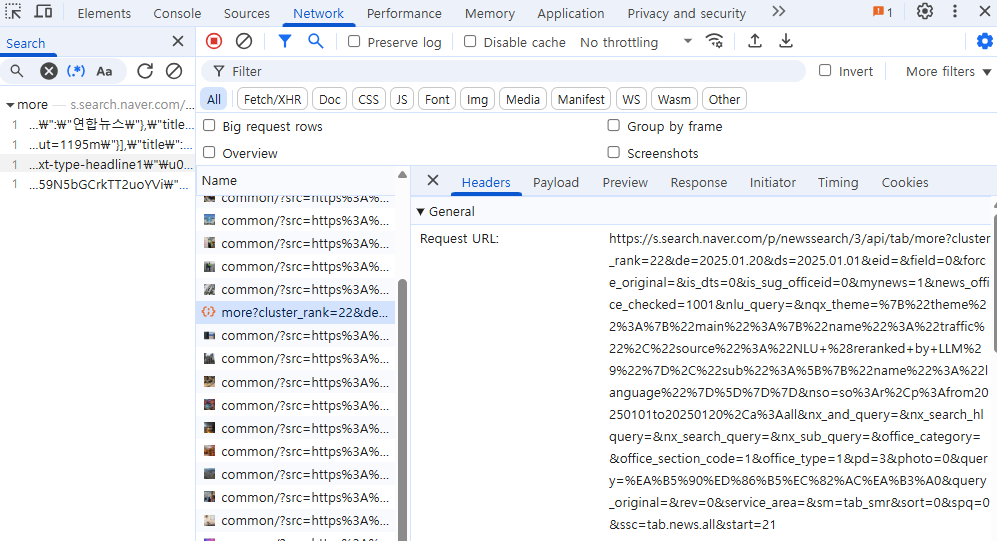

### 2)언론사별 naver id 확인

In [36]:
news_office={'경향신문': 1032,
 '국민일보': 1005,
 '동아일보': 1020,
 '문화일보': 1021,
 '서울신문': 1081,
 '세계일보': 1022,
 '조선일보': 1023,
 '중앙일보': 1025,
 '한겨레': 1028,
 '한국일보': 1469,
 '뉴스1': 1421,
 '뉴시스': 1003,
 '연합뉴스': 1001,
 '연합뉴스TV': 1422,
 '채널A': 1449,
 '한국경제TV': 1215,
 'JTBC': 1437,
 'KBS': 1056,
 'MBC': 1214,
 'MBN': 1019,
 'SBS': 1055,
 'SBS Biz': 1374,
 'TV조선': 1448,
 'YTN': 1052,
 '매일경제': 1009,
 '머니투데이': 1008,
 '비즈워치': 1648,
 '서울경제': 1011,
 '아시아경제': 1277,
 '이데일리': 1018,
 '조선비즈': 1366,
 '조세일보': 1123,
 '파이낸셜뉴스': 1014,
 '한국경제': 1015,
 '헤럴드경제': 1016,
 '노컷뉴스': 1079,
 '더팩트': 1629,
 '데일리안': 1119,
 '머니S': 1417,
 '미디어오늘': 1006,
 '아이뉴스24': 1031,
 '오마이뉴스': 1047,
 '프레시안': 1002,
 '디지털데일리': 1138,
 '디지털타임스': 1029,
 '블로터': 1293,
 '전자신문': 1030,
 '지디넷코리아': 1092,
 '더스쿠프': 1665,
 '레이디경향': 1145,
 '매경이코노미': 1024,
 '시사IN': 1308,
 '시사저널': 1586,
 '신동아': 1262,
 '월간 산': 1094,
 '이코노미스트': 1243,
 '주간경향': 1033,
 '주간동아': 1037,
 '주간조선': 1053,
 '중앙SUNDAY': 1353,
 '한겨레21': 1036,
 '한경비즈니스': 1050,
 '기자협회보': 1127,
 '농민신문': 1662,
 '뉴스타파': 1607,
 '동아사이언스': 1584,
 '여성신문': 1310,
 '일다': 1007,
 '코리아중앙데일리': 1640,
 '코리아헤럴드': 1044,
 '코메디닷컴': 1296,
 '헬스조선': 1346,
 '강원도민일보': 1654,
 '강원일보': 1087,
 '경기일보': 1666,
 '국제신문': 1658,
 '대구MBC': 1657,
 '대전일보': 1656,
 '매일신문': 1088,
 '부산일보': 1082,
 '전주MBC': 1659,
 'CJB청주방송': 1655,
 'JIBS': 1661,
 'kbc광주방송': 1660,
 '신화사 연합뉴스': 1348,
 'AP연합뉴스': 1077,
 'EPA연합뉴스': 1091}

### 3)함수 만들기

In [37]:
import requests
from bs4 import BeautifulSoup
import urllib
import pandas as pd
import time
from tqdm import tqdm

def navernews_network_scrape(
    query: str = '경희대',
    media: str = '한겨레',        # news_office 키 또는 '전체'
    date_from: int = 20250801, # YYYYMMDD
    date_to:   int = 20250826, # YYYYMMDD
    sort:      int = 2,        # 0=관련도순, 1=최신순, 2=오래된순
    news_type: int = 0,        # 0=전체, 1=포토, 2=동영상, 3=지면기사, 4=보도자료, 5=자동생성기사
    pages:     int = 1,        # 몇 페이지까지 검색(1,11,21…). 최대 400페이지 가능(1페이지당 기사 10건)
    ) -> pd.DataFrame:

    # 문자열로 변환
    date_from_str = str(date_from)
    date_to_str = str(date_to)
    sort_str = str(sort)
    news_type_str = str(news_type)

    # 매개변수 부분의 인자 생성
    q = urllib.parse.quote(query)
    if media == '전체':
        media_id = ''
    else:
        # news_office 딕셔너리가 정의되어 있어야 함
        media_id = news_office.get(media, '')

    ds = f"{date_from_str[:4]}.{date_from_str[4:6]}.{date_from_str[6:]}"
    de = f"{date_to_str[:4]}.{date_to_str[4:6]}.{date_to_str[6:]}"
    nso = f"so%3Ar%2Cp%3Afrom{date_from_str}to{date_to_str}%2Ca%3Aall"

    # 각 페이지별 url 생성
    results_list = []
    for page in tqdm(range(1, pages+1)):
        start = str((page-1) * 10 + 1)     # 1, 11, 21, ...
        target_url = (
            "https://s.search.naver.com/p/newssearch/3/api/tab/more"
            f"?query={q}"
            f"&ssc=tab.news.all"
            f"&pd=3"
            f"&photo={news_type_str}"
            f"&sort={sort_str}"
            f"&nso={nso}"
            f"&ds={ds}&de={de}"
            f"&start={start}"
            f"&news_office_checked={media_id}"
            f"&mynews=1"
            f"&office_type=1"
            f"&office_section_code=1"
        )

        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36",
            "Referer": f"https://search.naver.com/search.naver?where=news&query={q}"
        }

        response = requests.get(target_url, headers=headers)

        if response.status_code != 200:
            print(f"페이지 {page} 요청 실패: 상태 코드 {response.status_code}")
            continue

        try:
            data = response.json()

            # 응답에 collection 키가 있는지, 비어있지 않은지 확인
            if not data.get('collection'):
                print(f"페이지 {page}에 수집할 데이터가 없습니다.")
                continue

            html = data['collection'][0].get('html', '')
            if not html:
                print(f"페이지 {page}에 HTML 데이터가 없습니다.")
                continue

            soup = BeautifulSoup(html, 'html.parser')
            # 각 기사 아이템 선택 (OyoX13laVzzftRqUMHQP 클래스를 가진 div)
            news_items = soup.select('div.sds-comps-vertical-layout.sds-comps-full-layout.OyoX13laVzzftRqUMHQP')

            # 결과가 없으면 종료
            if not news_items:
                print(f"페이지 {page}에 결과가 없습니다. 수집 종료.")
                break

            # 기사 개별로 요소 추출
            result = []
            for news_item in news_items:
                try:
                    # 언론사 추출 - profile-info-title-text 내부의 span에서 텍스트 추출
                    media_elem = news_item.select_one('span.sds-comps-profile-info-title-text span.sds-comps-text')
                    media = media_elem.text.strip() if media_elem else ''

                    # 날짜 추출 - profile-info-subtext 내부에서 날짜 형식 찾기
                    date = ''
                    date_spans = news_item.select('span.sds-comps-profile-info-subtext div.DJwZySR1gWTQoLm3xvvD span.sds-comps-text')
                    for span in date_spans:
                        text = span.text.strip()
                        # 날짜 형식 확인 (YYYY.MM.DD 또는 유사한 형식)
                        if '.' in text and len(text.split('.')) >= 3:
                            # "면", "단", "네이버" 등의 키워드가 없는 경우만 날짜로 인식
                            if not any(keyword in text for keyword in ['면', '단', '네이버']):
                                date = text
                                break

                    # 네이버 URL 추출 - "네이버뉴스" 텍스트가 있는 링크
                    naver_url = ''
                    naver_links = news_item.select('a.T2s2rixtehFC2DsDea0v.DJwZySR1gWTQoLm3xvvD')
                    for link in naver_links:
                        if link.get('href') and 'naver.com' in link.get('href', ''):
                            # 링크 텍스트가 "네이버뉴스"인지 확인
                            link_text = link.get_text(strip=True)
                            if '네이버' in link_text:
                                naver_url = link['href']
                                break

                    # 언론사 URL 추출 - 기사 제목이나 본문을 감싸는 링크
                    media_url = ''
                    media_links = news_item.select('a.T2s2rixtehFC2DsDea0v.jKya96OjY1RWvTVfCpBm')
                    if media_links:
                        media_url = media_links[0].get('href', '')

                    # 제목 추출
                    title = ''
                    title_elem = news_item.select_one('span.sds-comps-text-type-headline1')
                    if title_elem:
                        title = title_elem.text.strip()

                    # 본문 추출 - 3줄 말줄임 텍스트
                    text = ''
                    text_elem = news_item.select_one('span.sds-comps-text-ellipsis-3.sds-comps-text-type-body1')
                    if text_elem:
                        # <mark> 태그 제거하고 순수 텍스트만 추출
                        text = text_elem.get_text(strip=True)

                    # 결과 리스트에 추가 (모든 필드가 있는 경우만)
                    if media or title:  # 최소한 언론사나 제목이 있는 경우만 추가
                        result.append([media, date, title, text, naver_url, media_url])

                except Exception as e:
                    print(f"기사 처리 중 오류 발생: {e}")
                    continue

            results_list.extend(result)

        except Exception as e:
            print(f"페이지 {page} 처리 중 오류 발생: {str(e)}")

        # 딜레이
        time.sleep(1)

    # 결과가 있는 경우에만 DataFrame 생성
    if results_list:
        df = pd.DataFrame(results_list, columns=['media', 'date', 'title', 'text', 'naver_url', 'media_url'])
        print(f"{df['date'].iloc[-1] if not df.empty and df['date'].iloc[-1] else '날짜 정보 없음'}까지 총 {len(df)}건 수집됐음.")
        return df
    else:
        print("수집된 데이터가 없습니다.")
        return pd.DataFrame(columns=['media', 'date', 'title', 'text', 'naver_url', 'media_url'])


### 4)실습

In [ ]:
query='손흥민'
media='전체'        # media= news_office에 있는 언론사 이름. 언론사 전체를 검색하려면 '전체' 입력
date_from=20250701
date_to=20250826
sort=2         # 0=관련도순, 1=최신순, 2=오래된순
news_type=0      # 0=전체, 1=포토, 2=동영상, 3=지면기사, 4=보도자료, 5=자동생성기사
pages=10       # 모두 몇페이지 수집할 것인지 결정. pages=5 이면 10건X5페이지로 총 50건 수집. 최대 400페이지 가능(1페이지당 기사 10건)

# 검색건수 확인이 안되므로 오래된 순으로 지정하고 여러번 검색. 400페이지(4000건)이 넘을 경우, 아래 마지막 수집된 기사의 날짜를 확인하고 그 날짜부터 다음 수집 시작.
final_result=navernews_network_scrape(query=query, media=media, date_from=date_from, date_to=date_to, sort=sort, news_type=news_type, pages=pages)

# 마지막 수집된 기사의 날짜 표시
if not final_result.empty:
    last_date = final_result['date'].iloc[-1]  # 마지막 행의 날짜
    print(f"🗓️  마지막 수집된 기사 날짜: {last_date}")
else:
    print("❌ 수집된 데이터가 없습니다.")


# 저장
final_result.to_excel('손흥민_news.xlsx')